In [ ]:
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-cp36-none-any.whl size=10375 sha256=9291163c3304145a28498ab45f4ec8a33517ab978ff800a94c33ce18c81369a5
  Stored in directory: /root/.cache/pip/wheels/f6/67/1f/64d62350d4cffe0a94e39af37828a6a5bfba1b9b9d6d95dbf8
Successfully built gvmagic


In [ ]:
import gvmagic

In [ ]:
def debruijnize(reads):
    nodes = set()
   
    edges = []
    for r in reads:
        r1 = r[:-1]
        r2 = r[1:]
        nodes.add(r1)
        nodes.add(r2)
        edges.append((r1,r2))       
    return (nodes,edges)

def build_k_mer(str,k):
    return [str[i:k+i] for i in range(0,len(str)-k+1)]


def make_node_edge_map(edges):
    node_edge_map = {}
    for e in edges:
        n = e[0]
        if n in node_edge_map:
            node_edge_map[n].append(e[1])
        else:
            node_edge_map[n] = [e[1]]
    return node_edge_map

def visualize_debruijn(G):
    nodes = G[0]
    edges = G[1]
    dot_str= 'digraph "DeBruijn graph" {\n '
    for node in nodes:
        dot_str += '    %s [label="%s"] ;\n' %(node,node)
    for src,dst in edges:
        dot_str += '    %s->%s;\n' %(src,dst)
    return dot_str + '}\n'

visited = [] 
queue = []  

def BFS(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

  return visited

def assemble_trail(trail):
    if len(trail) == 0:
        return ""
    result = trail[0][:-1]   
    for node in trail:      
      if result[-1]==node[0]:          
         result += node[-1]
      else :
         result += node
    return result


In [ ]:
reads = build_k_mer("TTAGCTT",3)
print(reads)

['TTA', 'TAG', 'AGC', 'GCT', 'CTT']


In [ ]:
G = debruijnize(reads)
print(G)

({'GC', 'TA', 'AG', 'TT', 'CT'}, [('TT', 'TA'), ('TA', 'AG'), ('AG', 'GC'), ('GC', 'CT'), ('CT', 'TT')])


In [ ]:
m = make_node_edge_map(G[1])
print(m)

{'TT': ['TA'], 'TA': ['AG'], 'AG': ['GC'], 'GC': ['CT'], 'CT': ['TT']}


In [ ]:
b=BFS(visited,m,'TT')

TT TA AG GC CT 

In [ ]:
List = ['TT', 'TA', 'AG','GC', 'CT'] 

In [ ]:
get_ipython().magic(u'load_ext gvmagic')

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


De-Bruijn Graph:


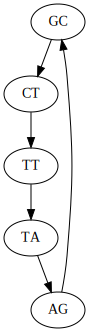

In [ ]:
print('De-Bruijn Graph:')
get_ipython().magic(u'dotstr visualize_debruijn(G)')

In [ ]:
 assemble_trail(List)

'TTAGCT'